**Create your jupyter notebook to follow this session.** In the terminal type:

```> jupyter notebook intro_ml.pynb```

**Import** basic libraries 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


___
# Machine learning

## General workflow

Definition:
> ML is a set of methods that can **automatically detect patterns** in data, and then use the uncovered patterns to **predict future data** (*from Machine Learning: A Probabilistic Perspective (Murphy 2012)*)

Two main phases:
1. **Training** an algorithm in machine learning means detecting patterns in a dataset
1. **Testing** an algorithm means predicting future data, that is generalizing the uncovered trained patterns to new datasets

The general workflow is:
1. Load **datasets**:
    * A **training dataset** 
        * it will be denoted as `X_train` 
        * in supervised setting, datasets also include a list of labels `y_train` associated to the samples in `X_train`
        
    * A **testing dataset** 
        * it will be denoted `X_test`
        * in supervised setting, the list of labels is `y_test`

1. Train the algorithm on the training dataset

1. Test the trained algorithm on the testing dataset

## Machine learning in python: scikit-learn

We will demonstrate machine learning methods with scikit-learn (sklearn), one the most used machine learning library in python. If you don't have the library installed, you can refer to the [Instructions to workshop participants](https://github.com/florisvanvugt/workshop4june2017).

In [10]:
# Test if sklearn is installed:
import sklearn

**Sklearn API**: http://scikit-learn.org/stable/modules/classes.html

___
# A Toy Example: The Iris Dataset

### Description

This dataset consists of 3 different types of irises’ (**Setosa**, **Versicolour**, and **Virginica**) given by their:
* Sepal Length
* Sepal Width
* Petal Length 
* Petal Width.

The classes are encoded as integers: 
* Setosa = 0
* Versicolour = 1
* Virginica = 2

Rows are the samples and the columns the feature dimensions (Sepal Length, Sepal Width, Petal Length and Petal Width).

### Iris dataset in sklearn

In [74]:
from sklearn import datasets
iris = datasets.load_iris()

In [75]:
features = iris.data
labels = iris.target

In [13]:
print('Number of observations:', len(features), ' | Dimension:', len(features[0]))

Number of observations: 150  | Dimension: 4


In [14]:
features[:5,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [15]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# Pandas-style data structure
data = {'Sepal_Length':[], 'Sepal_Width':[], 'Petal_Length':[], 'Petal_Width':[], 'Iris_Type':[]}
for n in range(len(features)):
    data['Sepal_Length'].append( features[n,0] )
    data['Sepal_Width'].append( features[n,1] )
    data['Petal_Length'].append( features[n,2] )
    data['Petal_Width'].append( features[n,3] )
    data['Iris_Type'].append( labels[n] )

In [18]:
data_pandas = pd.DataFrame(data)

In [19]:
data_pandas

,Iris_Type,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
0,0,1.4,0.2,5.1,3.5
1,0,1.4,0.2,4.9,3.0
2,0,1.3,0.2,4.7,3.2
3,0,1.5,0.2,4.6,3.1
4,0,1.4,0.2,5.0,3.6
5,0,1.7,0.4,5.4,3.9
6,0,1.4,0.3,4.6,3.4
7,0,1.5,0.2,5.0,3.4
8,0,1.4,0.2,4.4,2.9
9,0,1.5,0.1,4.9,3.1


### Visualizing the dataset

**Problem:** Feature dimension is **4**, which makes it hard to visualize in a simple 2-d plot. 

_Choice 1:_ we select only the two first dimensions and visualize them in a scatter plot.

In [20]:
data_x = features[:,0] # sepal length
data_y = features[:,1] # sepal width

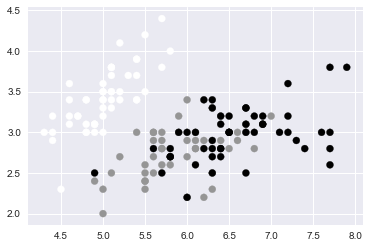

In [25]:
scatter(data_x, data_y, c=labels)

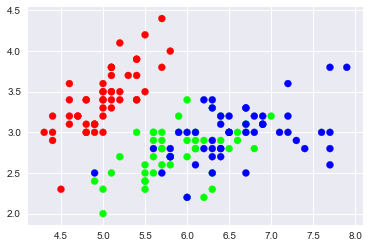

In [28]:
# explicit color for labels
color_table = [[1.,0.,0.], [0.,1.,0.], [0.,0.,1.]]
label_colors = [ color_table[l] for l in labels ]
scatter(data_x, data_y, c=label_colors)

_Choice 2:_ we can also try with two other feature dimensions, for instance petal length and width.

In [30]:
data_x = features[:,2] # petal length
data_y = features[:,3] # petal width

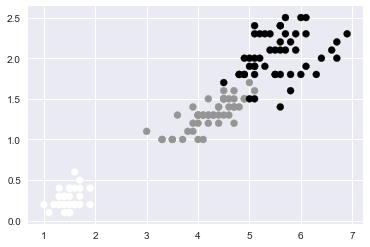

In [31]:
scatter(data_x, data_y, c=labels)

___
# Training a Classifier on the Iris Dataset

Example of **Support Vector Machine (SVM)**

The support vector machine, in its simplest version, is a **linear discriminant model**. Readings:
* C Cortes, V Vapnik. Support-vector networks. _Machine learning_ 20 (3), 273-297, 1995
* B Schölkopf, AJ Smola. Learning with kernels: support vector machines, regularization, optimization, and beyond. *MIT press*, 2002

SVM in sklearn:

In [89]:
from sklearn import svm

Initialize a new SVM instance called `classifier`:

In [90]:
classifier = svm.SVC()

In [91]:
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

We use the linear version (simpler) of support vector machine:

In [92]:
classifier = svm.SVC(kernel='linear')

In [93]:
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Training SVM

Classification is a supervised learning task, meaning that it learns the function mapping feature samples to known labels. 

In [100]:
for n in range(len(features)):
    print(features[n,:], '\t==> ', labels[n])

[ 5.1  3.5  1.4  0.2] 	==>  0
[ 4.9  3.   1.4  0.2] 	==>  0
[ 4.7  3.2  1.3  0.2] 	==>  0
[ 4.6  3.1  1.5  0.2] 	==>  0
[ 5.   3.6  1.4  0.2] 	==>  0
[ 5.4  3.9  1.7  0.4] 	==>  0
[ 4.6  3.4  1.4  0.3] 	==>  0
[ 5.   3.4  1.5  0.2] 	==>  0
[ 4.4  2.9  1.4  0.2] 	==>  0
[ 4.9  3.1  1.5  0.1] 	==>  0
[ 5.4  3.7  1.5  0.2] 	==>  0
[ 4.8  3.4  1.6  0.2] 	==>  0
[ 4.8  3.   1.4  0.1] 	==>  0
[ 4.3  3.   1.1  0.1] 	==>  0
[ 5.8  4.   1.2  0.2] 	==>  0
[ 5.7  4.4  1.5  0.4] 	==>  0
[ 5.4  3.9  1.3  0.4] 	==>  0
[ 5.1  3.5  1.4  0.3] 	==>  0
[ 5.7  3.8  1.7  0.3] 	==>  0
[ 5.1  3.8  1.5  0.3] 	==>  0
[ 5.4  3.4  1.7  0.2] 	==>  0
[ 5.1  3.7  1.5  0.4] 	==>  0
[ 4.6  3.6  1.   0.2] 	==>  0
[ 5.1  3.3  1.7  0.5] 	==>  0
[ 4.8  3.4  1.9  0.2] 	==>  0
[ 5.   3.   1.6  0.2] 	==>  0
[ 5.   3.4  1.6  0.4] 	==>  0
[ 5.2  3.5  1.5  0.2] 	==>  0
[ 5.2  3.4  1.4  0.2] 	==>  0
[ 4.7  3.2  1.6  0.2] 	==>  0
[ 4.8  3.1  1.6  0.2] 	==>  0
[ 5.4  3.4  1.5  0.4] 	==>  0
[ 5.2  4.1  1.5  0.1] 	==>  0
[ 5.5  4.2

Training on the full dataset:

In [101]:
classifier.fit(features, labels);

Training on the two first dimensions:

In [102]:
classifier.fit(features[:,:2], labels);

**NOTES**
* `fit` is the generic function to train any methods in sklearn
* for supervised methods, `fit` accepts two arguments: the feature data and their labels, that is `fit(X_train, y_train)`
* for unsupervised methods, `fit` accepts only one argument: the feature data, that is `fit(X_train)`

### Understanding training in SVM

Understanding training procedure in machine learning starts by understanding the **decision boundary** which is the set of borders delimiting regions in the feature space associated to each labels. 

Let's take the two last dimensions of the iris data

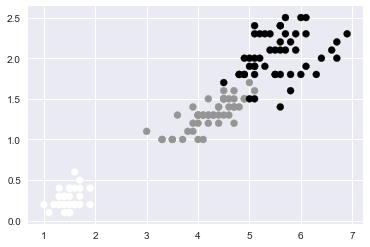

In [163]:
scatter(features[:,2], features[:,3], c=labels)

Let's consider only two classes (0 and 1)

In [114]:
np.where( labels < 2 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [115]:
index_classes_0_and_1 = np.where( labels < 2 )[0]

In [164]:
X_train = features[index_classes_0_and_1, 2:]
y_train = labels[index_classes_0_and_1]

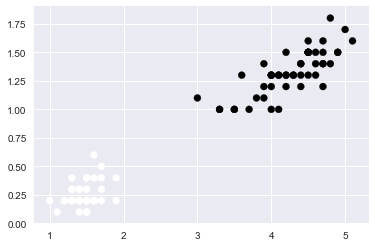

In [165]:
scatter(X_train[:,0], X_train[:,1], c=y_train)

**Question: what is the best decision boundary between classes 0 and 1?**

Linear models, such as SVM, consider linear decision boundaries, which means here a **line**!

A line can be define by 2 parameters:

In [167]:
slope = -0.1
intercept = 1.2

We generate the corresponding line:

In [168]:
boundary_x = np.linspace(1,5)
boundary_y = slope * boundary_x + intercept

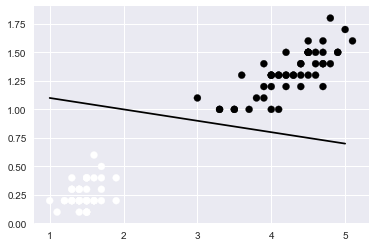

In [169]:
scatter(X_train[:,0], X_train[:,1], c=y_train)
plot(boundary_x, boundary_y, '-k')

**Is that good enough?**

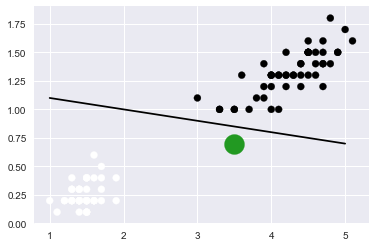

In [170]:
scatter(X_train[:,0], X_train[:,1], c=y_train)
plot(boundary_x, boundary_y, '-k')
scatter(3.5, 0.7, c='#229922', s=400)

Trying with other parameters:

In [172]:
slope = -1.0
intercept = 3.2

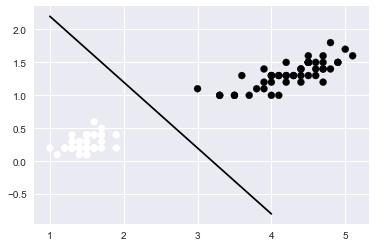

In [173]:
boundary_x = np.linspace(1,4)
boundary_y = slope * boundary_x + intercept

scatter(X_train[:,0], X_train[:,1], c=y_train)
plot(boundary_x, boundary_y, '-k')

=> Looks better....

<span style="color:#AA1111; font-size: 16px;">TRAINING</span>
* means finding the best parameters wrt the set of samples
* can often be understood as an OPTIMIZATION problem (i.e. finding a decision boundary such as miminzing a certain **cost function**)

#### Inspecting the result given by **SVM**

Train classifier with the sub-dataset comprised of only 2 classes:

In [174]:
classifier.fit(X_train, y_train);

Result of training is given by the the `coef_` structure:

In [175]:
coefs = classifier.coef_[0]

In [176]:
slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[0] / coefs[1]

In [177]:
slope

-1.5714285714285714

In [178]:
intercept

-4.6857142448425284

In [179]:
boundary_x = np.linspace(1.5,3.5)
boundary_y = slope * boundary_x - intercept

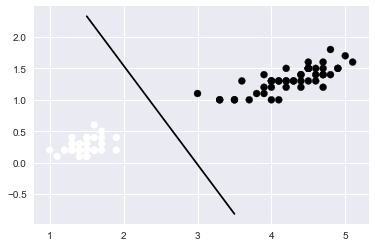

In [180]:
scatter(X_train[:,0], X_train[:,1], c=y_train)
plot(boundary_x, boundary_y, '-k')

### Dealing with more than one class

In [181]:
X_train = features[:,2:]
y_train = labels

In [182]:
classifier.fit(X_train, y_train);

Plotting decision boundary between Class 1 [white] and Class 2 [grey]

In [183]:
coefs = classifier.coef_[0]

In [184]:
slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[0] / coefs[1]

In [185]:
boundary_x = np.linspace(0,10)
boundary_y = slope * boundary_x - intercept

(-0.5, 3.0)

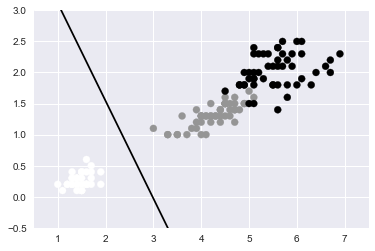

In [186]:
scatter(X_train[:,0], X_train[:,1], c=y_train)
plot(boundary_x, boundary_y, '-k')

xlim([0.5,7.5])
ylim([-0.5,3.0])

Plotting decision boundary between Class 1 [white] and Class 3 [black]

(-0.5, 3.0)

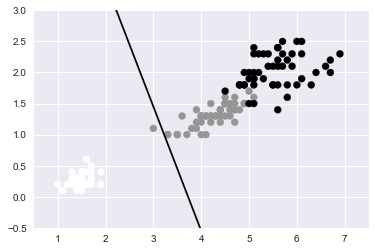

In [187]:
case = 1

coefs = classifier.coef_[case]

slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[case] / coefs[1]

boundary_x = np.linspace(0,10)
boundary_y = slope * boundary_x - intercept

scatter(X_train[:,0], X_train[:,1], c=y_train)
plot(boundary_x, boundary_y, '-k')

xlim([0.5,7.5])
ylim([-0.5,3.0])

Plotting decision boundary between Class 2 [grey] and Class 3 [black]

(-0.5, 3.0)

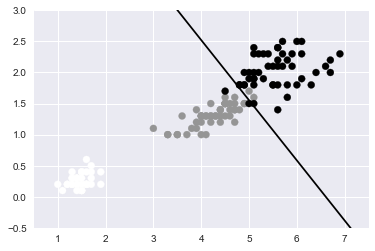

In [188]:
case = 2

coefs = classifier.coef_[case]

slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[case] / coefs[1]

boundary_x = np.linspace(0,10)
boundary_y = slope * boundary_x - intercept

scatter(X_train[:,0], X_train[:,1], c=y_train)
plot(boundary_x, boundary_y, '-k')

xlim([0.5,7.5])
ylim([-0.5,3.0])

#### Visualizing the partitions the underlying vector space

In [193]:
xx = np.linspace(0.5, 7.5, 200)
yy = np.linspace(-0.5, 3.0, 200)

In [194]:
zz = np.zeros((xx.shape[0],yy.shape[0]))
for i in range(len(xx)):
    for j in range(len(yy)):
        zz[i,j] = classifier.predict( np.array([xx[i],yy[j]]).reshape(1,-1) )

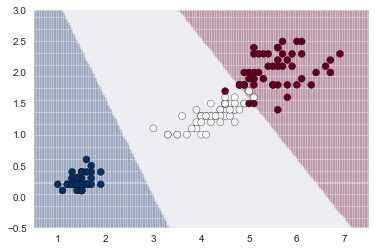

In [195]:
pcolormesh(xx, yy, -zz.T, cmap=plt.cm.RdBu, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu_r)

___
# Create Training and Testing Datasets

_Reminder:_ ML method is trained on a **training dataset** and its generalizability is evaluated on a **testing dataset**.

**Our goal here:** splitting the Iris dataset into training and testing sub-datasets.

In [80]:
# For convenience we convert python lists in numpy array
X = np.array( features[:,:] )
y = np.array( labels )

In [81]:
# This allows us to access elements in each matrix through list of indexes
indexes = [1,3,7]
X[indexes]

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.4,  1.5,  0.2]])

### Splitting datasets in scikit-learn

From the API: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Function | Description
--- | ---
`model_selection.KFold([n_splits, shuffle, ...])` | K-Folds cross-validator
`model_selection.GroupKFold([n_splits])`	| K-fold iterator variant with non-overlapping groups.
`model_selection.StratifiedKFold([n_splits, ...])`	| Stratified K-Folds cross-validator
`model_selection.LeaveOneGroupOut()`	| Leave One Group Out cross-validator
`model_selection.LeavePGroupsOut(n_groups)`	| Leave P Group(s) Out cross-validator
`model_selection.LeaveOneOut()`	| Leave-One-Out cross-validator
`model_selection.LeavePOut(p)`	| Leave-P-Out cross-validator
`model_selection.ShuffleSplit([n_splits, ...])`	| Random permutation cross-validator
`model_selection.GroupShuffleSplit([...])`	| Shuffle-Group(s)-Out cross-validation iterator
`model_selection.StratifiedShuffleSplit([...])`	| Stratified ShuffleSplit cross-validator
`model_selection.PredefinedSplit(test_fold)`	| Predefined split cross-validator
`model_selection.TimeSeriesSplit([n_splits])`	| Time Series cross-validator

Example with **stratified k-fold**

In [77]:
from sklearn.model_selection import StratifiedKFold

In [78]:
splitter = StratifiedKFold( n_splits=3 )

In [79]:
splitter.split(X,y)

<generator object _BaseKFold.split at 0x10adbb7d8>

In [82]:
for train_index, test_index in splitter.split(X,y):
    print("training:", labels[train_index])
    print("testing:", labels[test_index])

training: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
testing: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
training: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
testing: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
training: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
testing: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


If the number of folds equals the number of samples per class, it is equivalent to a leave-one-out cross-validation test.

In [83]:
splitter = StratifiedKFold(n_splits=50)
for train_index, test_index in splitter.split(X,y):
    print("training:", labels[train_index])
    print("testing:", labels[test_index])

training: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
testing: [0 1 2]
training: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
testing: [0 1 2]
training: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
testing: [0 1 2]
training: [0 0 0 0 0 0

## Testing SVM on the splitted datasets

In [ ]:
splitter = StratifiedKFold(n_splits=5)
train_index, test_index = next(splitter.split(X,y))

In [ ]:
train_index

In [ ]:
test_index

In [ ]:
y[test_index]

In [ ]:
# training dataset
X_train = X[train_index]
y_train = y[train_index]

# testing dataset
X_test = X[test_index]
y_test = y[test_index]

In [ ]:
# init SVM classifier
classifier = svm.SVC(kernel='linear')

# train VM classifier
classifier.fit(X_train, y_train)   
    
# test SVM classifier and store output
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
num_errors = 0
for i,yi in enumerate(y_pred):
    if (yi != y_test[i]):
        num_errors += 1
(1.0 - num_errors/len(y_pred))*100

In [ ]:
# sklearn function
score = classifier.score(X_test, y_test)
score

### Effect of input features

Use the two first dimensions

In [ ]:
figure(figsize=(16,5))
subplot(1,2,1)
scatter(X_train[:,0], X_train[:,1], c=y_train)
subplot(1,2,2)
scatter(X_test[:,0], X_test[:,1], c=y_test)

In [ ]:
# init, train, test
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train[:,:2], y_train)
score = classifier.score(X_test[:,:2], y_test)
score

In [ ]:
color_table = ['#FFFFFF', '#999999', '#000000']
colors = [color_table[i] for i in y_test]

scatter(X_test[:,0], X_test[:,1], c=colors)

for i,test in enumerate(X_test[:,:2]):
    true_label = y_test[i]
    predicted_label = classifier.predict(test.reshape(1,-1))[0]
    if (predicted_label != true_label):
        scatter(test[0], test[1], c=color_table[true_label], edgecolors=color_table[predicted_label], s=100, linewidth=2)

Use the two last dimensions

In [ ]:
figure(figsize=(16,5))
subplot(1,2,1)
scatter(X_train[:,2], X_train[:,3], c=y_train)
subplot(1,2,2)
scatter(X_test[:,2], X_test[:,3], c=y_test)

In [ ]:
# init, train, test
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train[:,2:], y_train)
score = classifier.score(X_test[:,2:], y_test)
score

In [ ]:
classifier.predict(X_test[:,2:])

In [ ]:
colors = [color_table[i] for i in y_test]

scatter(X_test[:,2], X_test[:,3], c=colors)

for i,test in enumerate(X_test[:,2:]):
    true_label = y_test[i]
    predicted_label = classifier.predict(test.reshape(1,-1))[0]
    if (predicted_label != true_label):
        scatter(test[0], test[1], c=color_table[true_label], edgecolors=color_table[predicted_label], s=100, linewidth=2)

### Automatized testing

#### Loop on splits

In [ ]:
splitter = StratifiedKFold(n_splits=10)

all_scores = []

for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]   
    
    # declare classifier
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train,y_train)   
    
    # compute score on testing dataset and store it
    score = classifier.score(X_test,y_test)
    all_scores.append(score)  
    
    # print score
    print('score: %.2f%%'%(score*100))

In [ ]:
print(np.mean(all_scores)*100)

___
# Non-linear classification methods

## Non-linear SVM

In [ ]:
splitter = StratifiedKFold(n_splits=7)

train_index, test_index = next(splitter.split(X,y))

X_train = X[train_index]
y_train = y[train_index]

X_test = X[test_index]
y_test = y[test_index]

In [ ]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train[:,:2],y_train)   
print( svm_classifier.score(X_test[:,:2],y_test) )

In [ ]:
xx = np.linspace(4, 8, 200)
yy = np.linspace(1.5, 4.5, 200)
zz = np.zeros((xx.shape[0],yy.shape[0]))

for i in range(len(xx)):
    for j in range(len(yy)):
        zz[i,j] = svm_classifier.predict( np.array([xx[i],yy[j]]).reshape(1,-1) )

plt.pcolormesh(xx, yy, -zz.T, cmap=plt.cm.RdBu, alpha=0.1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu_r)
plt.show()

In [ ]:
svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(X_train[:,:2],y_train)   
print( svm_classifier.score(X_test[:,:2],y_test) )

In [ ]:
def plot_decision_function(trained_classifier, X_train, y_train):
    xx = np.linspace(4, 8, 200)
    yy = np.linspace(1.5, 4.5, 200)
    zz = np.zeros((xx.shape[0],yy.shape[0]))
    for i in range(len(xx)):
        for j in range(len(yy)):
            zz[i,j] = trained_classifier.predict( np.array([xx[i],yy[j]]).reshape(1,-1) )
    plt.pcolormesh(xx, yy, -zz.T, cmap=plt.cm.RdBu, alpha=0.1)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu_r)
    plt.show()

plot_decision_function(svm_classifier, X_train, y_train)

### K-Nearest Neighbor

K-Nearest Neighbor (k-NN) is a template-based method.

![knn](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png "kNN")


In [ ]:
from sklearn import neighbors

In [ ]:
knn_classifier = neighbors.KNeighborsClassifier(1)
knn_classifier.fit(X_train[:,:2],y_train)   
print( knn_classifier.score(X_test[:,:2],y_test) )

In [ ]:
plot_decision_function(knn_classifier, X_train, y_train)

In [ ]:
knn_classifier = neighbors.KNeighborsClassifier(40)
knn_classifier.fit(X_train[:,:2],y_train)   
print( knn_classifier.score(X_test[:,:2],y_test) )
plot_decision_function(knn_classifier, X_train, y_train)

___
# Classification on the Forest dataset

## Load dataset

In [ ]:
classes = ['ambient', 'country', 'metal', 'rocknroll', 'symphonic']

In [ ]:
features = []
labels = []
for c in classes:
    for t in range(5):
        for d in np.loadtxt('datasets/features/%s_%03i.mfs'%(c,t), delimiter=','):
            features.append(list(d))
            labels.append(classes.index(c))

features = np.array( features )
labels = np.array( labels )

In [ ]:
features.shape

In [ ]:
labels.shape

In [ ]:
plt.scatter(features[:,0],features[:,1],c=labels)
plt.show()

In [ ]:
splitter = StratifiedKFold(n_splits=10)
all_scores = []

for train_index, test_index in splitter.split( features, labels):
    X_train,X_test = features[train_index], features[test_index]
    y_train,y_test = labels[train_index], labels[test_index]   
    #    classifier = svm.SVC(kernel='linear')
    # classifier = neighbors.KNeighborsClassifier(3)
    classifier = discriminant_analysis.LinearDiscriminantAnalysis()
    classifier.fit(X_train,y_train)   
    all_scores.append( classifier.score(X_test,y_test) )  
    
print('global score: %.2f%%'%(np.mean(all_scores)*100))

#### Comparing classifiers

In [ ]:
classifiers = { 'SVM': svm.SVC, 
                'kNN': neighbors.KNeighborsClassifier,
                'LDA': discriminant_analysis.LinearDiscriminantAnalysis }

all_scores = {'SVM': [], 'kNN': [], 'LDA': []}

splitter = StratifiedKFold(n_splits=30)

for train_index, test_index in splitter.split(X,y):

    # select training and testing datasets
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]   
    
    for clf_key in classifiers.keys():
        
        # declare classifier
        classifier = classifiers[clf_key]()
        classifier.fit(X_train[:,:],y_train)   

        # compute score on testing dataset and store it
        score = classifier.score(X_test[:,:],y_test)
        all_scores[clf_key].append(score)  


In [ ]:
for clf_key in classifiers.keys():
    print(clf_key, np.mean(all_scores[clf_key])*100)

# Inspecting/Improving Classification

## Confusion matrix

## Setting free parameters

___
About this material: copyright Baptiste Caramiaux (write me for any questions or use of this material [email](mailto:baptiste.caramiaux@ircam.fr))
___